## Installing Libraries and Dependencies

In [2]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt

## Dataset Description and Preprocessing

In [1]:
train_path  = "dataset\\train"
valid_path  = "dataset\\val"
test_path   = "dataset\\test"

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D
import keras

In [ ]:
from keras.applications.resnet50 import preprocess_input, ResNet50


In [7]:
train_data_gen = ImageDataGenerator(
                                    zoom_range= 0.2, 
                                    horizontal_flip= True, 
                                    shear_range= 0.2,
                                    
                                    )

train = train_data_gen.flow_from_directory(directory= train_path, 
                                           target_size=(224,224))

Found 4997 images belonging to 2 classes.


In [8]:
validation_data_gen = ImageDataGenerator()

valid = validation_data_gen.flow_from_directory(directory= valid_path, 
                                                target_size=(224,224))

Found 1000 images belonging to 2 classes.


In [9]:
test_data_gen = ImageDataGenerator()

test = train_data_gen.flow_from_directory(directory= test_path , 
                                          target_size=(224,224), 
                                          shuffle= False)

Found 999 images belonging to 2 classes.


In [10]:
class_type = {1:'Covid',  0 : 'Normal'}

In [11]:
t_img , label = train.next()

## Visualizing Images

In [13]:
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

## Implementing ResNet50 Model

In [18]:
from keras.applications.resnet import ResNet50
from keras.layers import Flatten , Dense, Dropout , MaxPool2D

In [19]:
res = ResNet50( input_shape=(224,224,3), include_top= False) # include_top will consider the new weights

94781440/94765736 [==============================] - 58s 1us/step


In [20]:
for layer in res.layers:           # Dont Train the parameters again 
    layer.trainable = False

In [21]:
x = Flatten()(res.output)
x = Dense(units=2 , activation='sigmoid', name = 'predictions' )(x)

# creating our model.
model = Model(res.input, x)

In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [23]:
model.compile( optimizer= 'adam' , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [24]:
# implementing early stopping and model check point 

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [25]:
hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 30, validation_data= valid , validation_steps= 16, callbacks=[es,mc])

C:\Users\DELL\AppData\Local\Temp\ipykernel_8764\3432473522.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 30, validation_data= valid , validation_steps= 16, callbacks=[es,mc])


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 3.5356 - accuracy: 0.7375
Epoch 1: val_accuracy improved from -inf to 0.78711, saving model to bestmodel.h5
10/10 [==============================] - 65s 6s/step - loss: 3.5356 - accuracy: 0.7375 - val_loss: 3.8114 - val_accuracy: 0.7871
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 3.4526 - accuracy: 0.7986
Epoch 2: val_accuracy improved from 0.78711 to 0.81445, saving model to bestmodel.h5
10/10 [==============================] - 67s 7s/step - loss: 3.4526 - accuracy: 0.7986 - val_loss: 4.1168 - val_accuracy: 0.8145
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 2.3680 - accuracy: 0.8469
Epoch 3: val_accuracy improved from 0.81445 to 0.84375, saving model to bestmodel.h5
10/10 [==============================] - 63s 7s/step - loss: 2.3680 - accuracy: 0.8469 - val_loss: 2.9358 - val_accuracy: 0.8438
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 2.8967 - ac

In [26]:
## load only the best model 
from keras.models import load_model
model = load_model("bestmodel.h5")

In [27]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

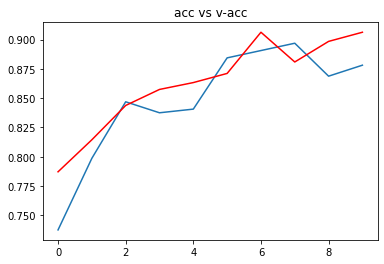

In [28]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

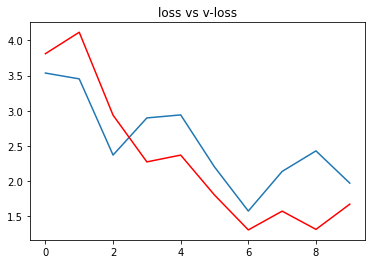

In [29]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [30]:
# checking out the accuracy of our model 

acc = model.evaluate_generator(generator= test)[1] 

print(f"The accuracy of your model is = {acc} %")

C:\Users\DELL\AppData\Local\Temp\ipykernel_8764\1957840212.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(generator= test)[1]


The accuracy of your model is = 0.9039039015769958 %
